In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tqdm import tqdm
import pytesseract
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import RMSprop
import os
import numpy as np
import cv2
from keras.models import load_model
from PIL import Image
from PIL import ImageChops, ImageEnhance
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from langdetect import detect
from datetime import datetime
import cv2

from langdetect import detect_langs  # For language detection
# Utility functions
import os


# Utility functions

In [1]:
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = 'tempresaved.jpg'
    im = Image.open(filename)
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    ela_im = ImageChops.difference(im, resaved_im)
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    return ela_im

def is_image(file_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
    return any(file_path.lower().endswith(ext) for ext in image_extensions)


def build_image_list(path_to_data, label, images):
    for file in tqdm(os.listdir(path_to_data)):
        file_path = os.path.join(path_to_data, file)
        if is_image(file_path):
            images.append(file_path)
    return images


# Data Preparation

### Path to list of original and tampered documents specific to your needs

In [3]:
custom_path_original = 'images/training/original'
custom_path_tampered = 'images/training/forged'

### Training dataset name

In [4]:
training_data_set = 'dataset.csv'

### Build image list for training

In [5]:
images = []
images = build_image_list(custom_path_original, '0', images)
images = build_image_list(custom_path_tampered, '1', images)

100%|██████████| 209/209 [00:00<?, ?it/s]


### Create a CSV file with image name (full path to image) and the label

In [6]:
image_name = []
label = []
language = []

for image_path in tqdm(images):
    image_name.append(image_path)
    label.append(os.path.basename(os.path.dirname(image_path)))  # Assuming folder name is the label
    try:
        # Extract text from image using OCR
        text = pytesseract.image_to_string(Image.open(image_path))
        # Detect language
        detected_lang = detect(text)
        language.append(detected_lang)
    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")
        language.append('unknown')

dataset = pd.DataFrame({'image': image_name, 'class_label': label, 'language': language})
dataset.to_csv(training_data_set, index=False)

  3%|▎         | 11/420 [00:00<00:08, 48.26it/s]

Error processing images/training/original\1.pdf_page0.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\2.pdf_page0.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\3.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\4.pdf_page0.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\4.pdf_page1.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\4.pdf_page2.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\4.pdf_page3.jpg: tesseract is not installed or it's not in your PATH

  5%|▌         | 21/420 [00:00<00:09, 43.43it/s]

Error processing images/training/original\BankStatement_1.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_10.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_11.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_12.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_13.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_14.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_15.jpg: tessera

  6%|▌         | 26/420 [00:00<00:09, 43.18it/s]

Error processing images/training/original\BankStatement_18.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_19.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_2.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_20.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_21.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_22.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_23.jpg: tessera

  9%|▊         | 36/420 [00:00<00:09, 40.00it/s]

Error processing images/training/original\BankStatement_25.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_26.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_27.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_28.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_29.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_3.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_30.jpg: tessera

 10%|▉         | 41/420 [00:00<00:09, 39.30it/s]

Error processing images/training/original\BankStatement_32.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_33.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_34.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_35.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_36.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_37.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_38.jpg: tesser

 12%|█▏        | 49/420 [00:01<00:09, 37.59it/s]

Error processing images/training/original\BankStatement_4.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_40.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_41.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_42.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_43.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_44.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_45.jpg: tessera

 14%|█▎        | 57/420 [00:01<00:09, 36.59it/s]

Error processing images/training/original\BankStatement_46.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_47.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_48.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_49.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_5.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_50.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_51.jpg: tessera

 15%|█▌        | 65/420 [00:01<00:09, 37.32it/s]

Error processing images/training/original\BankStatement_53.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_54.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_55.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_56.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_57.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_58.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_59.jpg: tesser

 17%|█▋        | 73/420 [00:01<00:09, 36.17it/s]

Error processing images/training/original\BankStatement_60.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_61.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_62.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_63.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_64.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_65.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_66.jpg: tesser

 19%|█▉        | 81/420 [00:02<00:09, 36.08it/s]

Error processing images/training/original\BankStatement_68.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_69.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_7.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_70.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_71.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_72.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_73.jpg: tessera

 21%|██        | 89/420 [00:02<00:09, 35.00it/s]

Error processing images/training/original\BankStatement_75.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_76.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_77.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_78.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_79.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_8.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_80.jpg: tessera

 23%|██▎       | 97/420 [00:02<00:09, 34.82it/s]

Error processing images/training/original\BankStatement_82.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_83.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_84.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_85.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_86.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_87.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_88.jpg: tesser

 25%|██▌       | 105/420 [00:02<00:08, 35.30it/s]

Error processing images/training/original\BankStatement_9.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_90.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_91.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_92.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_93.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_94.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_95.jpg: tessera

 27%|██▋       | 113/420 [00:03<00:09, 33.27it/s]

Error processing images/training/original\BankStatement_96.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_97.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_98.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\BankStatement_99.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_0.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 28%|██▊       | 117/420 [00:03<00:09, 30.78it/s]

Error processing images/training/original\Paystub_1.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_10.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_11.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_12.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_13.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 30%|██▉       | 124/420 [00:03<00:10, 28.57it/s]

Error processing images/training/original\Paystub_14.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_15.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_16.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_17.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_18.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_19.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 31%|███       | 130/420 [00:03<00:10, 27.85it/s]

Error processing images/training/original\Paystub_2.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_20.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_21.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_22.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_23.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_24.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 32%|███▏      | 136/420 [00:03<00:10, 27.25it/s]

Error processing images/training/original\Paystub_25.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_26.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_27.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_28.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_29.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_3.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 34%|███▍      | 142/420 [00:04<00:10, 26.73it/s]

Error processing images/training/original\Paystub_30.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_31.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_32.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_33.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_34.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_35.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 35%|███▌      | 148/420 [00:04<00:10, 26.29it/s]

Error processing images/training/original\Paystub_36.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_37.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_38.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_39.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_4.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_40.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 37%|███▋      | 154/420 [00:04<00:09, 26.66it/s]

Error processing images/training/original\Paystub_41.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_42.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_43.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_44.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_45.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_46.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 38%|███▊      | 160/420 [00:04<00:09, 26.58it/s]

Error processing images/training/original\Paystub_47.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_48.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_49.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_5.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_50.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_51.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 40%|███▉      | 166/420 [00:05<00:09, 26.54it/s]

Error processing images/training/original\Paystub_52.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_53.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_54.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_55.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_56.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_57.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 41%|████      | 172/420 [00:05<00:09, 26.61it/s]

Error processing images/training/original\Paystub_58.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_59.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_6.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_60.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_61.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_62.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 42%|████▏     | 178/420 [00:05<00:09, 26.80it/s]

Error processing images/training/original\Paystub_63.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_64.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_65.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_66.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_67.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_68.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 44%|████▍     | 184/420 [00:05<00:08, 26.24it/s]

Error processing images/training/original\Paystub_69.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_7.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_70.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_71.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_72.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_73.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 45%|████▌     | 190/420 [00:05<00:08, 26.64it/s]

Error processing images/training/original\Paystub_74.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_75.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_76.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_77.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_78.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_79.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 47%|████▋     | 196/420 [00:06<00:08, 26.53it/s]

Error processing images/training/original\Paystub_8.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_80.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_81.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_82.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_83.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_84.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 48%|████▊     | 202/420 [00:06<00:08, 26.79it/s]

Error processing images/training/original\Paystub_85.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_86.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_87.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_88.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_89.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_9.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 50%|████▉     | 208/420 [00:06<00:07, 26.86it/s]

Error processing images/training/original\Paystub_90.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_91.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_92.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_93.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_94.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_95.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 51%|█████     | 215/420 [00:06<00:06, 30.16it/s]

Error processing images/training/original\Paystub_96.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_97.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_98.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/original\Paystub_99.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\Tampered1.pdf_page0.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\Tampered2.pdf_page0.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\Tampered3.jpg: tesseract is not installed or it's no

 53%|█████▎    | 223/420 [00:07<00:05, 33.52it/s]

Error processing images/training/forged\Tampered4.pdf_page0.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_0.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_1.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_10.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_11.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\Tamp

 55%|█████▌    | 231/420 [00:07<00:05, 35.35it/s]

Error processing images/training/forged\TamperedBankStatement_14.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_15.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_16.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_17.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_18.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_19.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/f

 56%|█████▌    | 235/420 [00:07<00:05, 35.07it/s]

Error processing images/training/forged\TamperedBankStatement_21.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_22.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_23.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_24.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_25.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_26.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/f

 58%|█████▊    | 243/420 [00:07<00:04, 35.76it/s]

Error processing images/training/forged\TamperedBankStatement_28.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_29.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_3.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_30.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_31.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_32.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/fo

 60%|█████▉    | 251/420 [00:07<00:04, 35.67it/s]

Error processing images/training/forged\TamperedBankStatement_35.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_36.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_37.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_38.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_39.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_4.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/fo

 62%|██████▏   | 260/420 [00:08<00:04, 37.22it/s]

Error processing images/training/forged\TamperedBankStatement_42.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_43.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_44.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_45.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_46.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_47.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/f

 64%|██████▍   | 268/420 [00:08<00:04, 36.89it/s]

Error processing images/training/forged\TamperedBankStatement_5.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_50.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_51.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_52.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_53.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_54.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/fo

 66%|██████▌   | 276/420 [00:08<00:03, 36.36it/s]

Error processing images/training/forged\TamperedBankStatement_57.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_58.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_59.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_6.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_60.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_61.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/fo

 68%|██████▊   | 284/420 [00:08<00:03, 37.33it/s]

Error processing images/training/forged\TamperedBankStatement_64.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_65.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_66.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_67.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_68.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_69.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/f

 70%|██████▉   | 292/420 [00:08<00:03, 36.26it/s]

Error processing images/training/forged\TamperedBankStatement_72.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_73.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_74.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_75.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_76.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_77.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/f

 71%|███████▏  | 300/420 [00:09<00:03, 36.18it/s]

Error processing images/training/forged\TamperedBankStatement_79.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_8.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_80.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_81.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_82.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_83.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/fo

 73%|███████▎  | 308/420 [00:09<00:03, 35.22it/s]

Error processing images/training/forged\TamperedBankStatement_86.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_87.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_88.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_89.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_9.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_90.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/fo

 75%|███████▌  | 316/420 [00:09<00:02, 36.08it/s]

Error processing images/training/forged\TamperedBankStatement_93.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_94.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_95.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_96.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_97.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedBankStatement_98.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/f

 77%|███████▋  | 324/420 [00:09<00:03, 31.42it/s]

Error processing images/training/forged\TamperedPaystub.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystubv1.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_0.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_1.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_10.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_11.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 78%|███████▊  | 328/420 [00:10<00:03, 30.43it/s]

Error processing images/training/forged\TamperedPaystub_12.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_13.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_14.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_15.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_16.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_17.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_18.jpg: tesser

 80%|███████▉  | 335/420 [00:10<00:02, 29.23it/s]

Error processing images/training/forged\TamperedPaystub_19.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_2.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_20.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_21.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_22.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_23.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 81%|████████  | 341/420 [00:10<00:02, 28.77it/s]

Error processing images/training/forged\TamperedPaystub_24.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_25.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_26.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_27.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_28.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_29.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 83%|████████▎ | 347/420 [00:10<00:02, 28.09it/s]

Error processing images/training/forged\TamperedPaystub_3.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_30.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_31.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_32.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_33.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_34.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 84%|████████▍ | 353/420 [00:10<00:02, 27.32it/s]

Error processing images/training/forged\TamperedPaystub_35.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_36.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_37.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_38.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_39.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_4.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 85%|████████▌ | 359/420 [00:11<00:02, 27.50it/s]

Error processing images/training/forged\TamperedPaystub_40.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_41.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_42.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_43.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_44.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_45.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 87%|████████▋ | 365/420 [00:11<00:02, 26.92it/s]

Error processing images/training/forged\TamperedPaystub_46.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_47.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_48.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_49.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_5.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_50.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 89%|████████▉ | 374/420 [00:11<00:01, 27.60it/s]

Error processing images/training/forged\TamperedPaystub_51.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_52.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_53.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_54.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_55.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_56.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_57.jpg: tesser

 90%|█████████ | 380/420 [00:11<00:01, 27.34it/s]

Error processing images/training/forged\TamperedPaystub_58.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_59.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_6.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_60.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_61.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_62.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 92%|█████████▏| 386/420 [00:12<00:01, 27.64it/s]

Error processing images/training/forged\TamperedPaystub_63.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_64.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_65.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_66.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_67.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_68.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 93%|█████████▎| 392/420 [00:12<00:01, 27.32it/s]

Error processing images/training/forged\TamperedPaystub_69.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_7.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_70.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_71.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_72.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_73.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 95%|█████████▍| 398/420 [00:12<00:00, 27.69it/s]

Error processing images/training/forged\TamperedPaystub_74.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_75.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_76.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_77.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_78.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_79.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 96%|█████████▌| 404/420 [00:12<00:00, 26.82it/s]

Error processing images/training/forged\TamperedPaystub_8.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_80.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_81.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_82.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_83.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_84.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 98%|█████████▊| 410/420 [00:13<00:00, 27.24it/s]

Error processing images/training/forged\TamperedPaystub_85.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_86.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_87.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_88.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_89.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_9.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


 99%|█████████▉| 416/420 [00:13<00:00, 26.55it/s]

Error processing images/training/forged\TamperedPaystub_90.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_91.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_92.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_93.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_94.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_95.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


100%|██████████| 420/420 [00:13<00:00, 31.30it/s]

Error processing images/training/forged\TamperedPaystub_96.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_97.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_98.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Error processing images/training/forged\TamperedPaystub_99.jpg: tesseract is not installed or it's not in your PATH. See README file for more information.


### Read the dataset and convert to ELA format for training

In [7]:
import numpy as np
from keras.utils import to_categorical
import pandas as pd

# Assuming convert_to_ela_image and other necessary functions are defined elsewhere

dataset = pd.read_csv('dataset.csv')
X = []
Y = []
for index, row in dataset.iterrows():
    print(f"Processing image: {row['image']}")  # Print the image path for debugging
    try:
        X.append(np.array(convert_to_ela_image(row['image'], 90).resize((128, 128))).flatten() / 255.0)
        Y.append(row['class_label'])
    except Exception as e:
        print(f"Error processing {row['image']}: {str(e)}")

X = np.array(X)
# Convert class labels to integers
class_labels = dataset['class_label'].astype('category').cat.codes
Y = to_categorical(class_labels, num_classes=2)
X = X.reshape(-1, 128, 128, 3)

Processing image: images/training/original\1.pdf_page0.jpg
Processing image: images/training/original\2.pdf_page0.jpg
Processing image: images/training/original\3.jpg
Processing image: images/training/original\4.pdf_page0.jpg
Processing image: images/training/original\4.pdf_page1.jpg
Processing image: images/training/original\4.pdf_page2.jpg
Processing image: images/training/original\4.pdf_page3.jpg
Processing image: images/training/original\4.pdf_page4.jpg
Processing image: images/training/original\4.pdf_page5.jpg
Processing image: images/training/original\5.jpg
Processing image: images/training/original\BankStatement.jpg
Processing image: images/training/original\BankStatement_0.jpg
Processing image: images/training/original\BankStatement_1.jpg
Processing image: images/training/original\BankStatement_10.jpg
Processing image: images/training/original\BankStatement_11.jpg
Processing image: images/training/original\BankStatement_12.jpg
Processing image: images/training/original\BankStat

### Train-Test split of the dataset

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=5)

# CNN Model

In [9]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'valid',
                activation ='relu', input_shape = (128,128,3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'valid',
                activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

d:\document-tampering-detection-main\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    31,490,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,500,962 (120.17 MB)

 Trainable params: 31,500,962 (120.17 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define your model architecture
model = Sequential()

# Add convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the feature maps to feed into a fully connected layer
model.add(Flatten())

# Add fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 classes: Real and Fake

# Compile the model
optimizer = RMSprop(learning_rate=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Add learning rate reduction as callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
epochs = 50
batch_size = 50

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
                    validation_data=(X_val, Y_val), callbacks=[reduce_lr], verbose=2)


Epoch 1/50


d:\document-tampering-detection-main\venv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


7/7 - 5s - 766ms/step - accuracy: 0.5030 - loss: 0.7081 - val_accuracy: 0.5476 - val_loss: 0.6862 - learning_rate: 5.0000e-04
Epoch 2/50
7/7 - 4s - 620ms/step - accuracy: 0.5089 - loss: 0.6731 - val_accuracy: 0.5476 - val_loss: 0.6235 - learning_rate: 5.0000e-04
Epoch 3/50
7/7 - 4s - 605ms/step - accuracy: 0.5714 - loss: 0.6622 - val_accuracy: 0.4643 - val_loss: 0.6998 - learning_rate: 5.0000e-04
Epoch 4/50
7/7 - 4s - 604ms/step - accuracy: 0.7113 - loss: 0.6184 - val_accuracy: 0.4643 - val_loss: 0.7526 - learning_rate: 5.0000e-04
Epoch 5/50
7/7 - 4s - 640ms/step - accuracy: 0.6696 - loss: 0.6540 - val_accuracy: 0.7381 - val_loss: 0.5798 - learning_rate: 5.0000e-04
Epoch 6/50
7/7 - 4s - 643ms/step - accuracy: 0.8839 - loss: 0.4658 - val_accuracy: 0.7857 - val_loss: 0.4686 - learning_rate: 5.0000e-04
Epoch 7/50
7/7 - 4s - 640ms/step - accuracy: 0.7262 - loss: 0.4828 - val_accuracy: 0.9762 - val_loss: 0.3080 - learning_rate: 5.0000e-04
Epoch 8/50
7/7 - 4s - 624ms/step - accuracy: 0.8542 

# Save the model

In [12]:
import os
from datetime import datetime

models_dir = 'model'
current_time = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")  # Removed colon from format string
model_name = 'tampering_detection_' + current_time + '.keras'
model.save(os.path.join(models_dir, model_name))



In [13]:
models_artifact = '1.keras'  # Add the appropriate extension
model.save(os.path.join(models_dir, models_artifact))

# Model Performance

### Plot the loss and accuracy curves for training and validation 

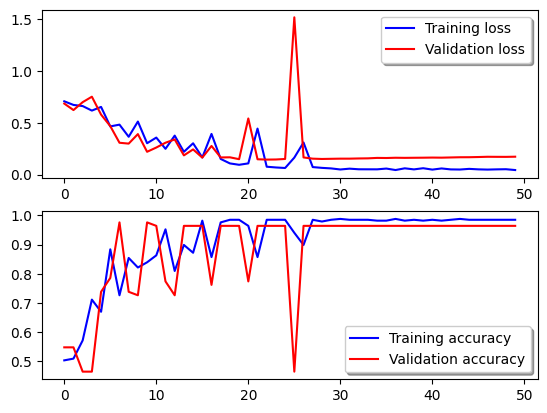

In [14]:
fig, ax = plt.subplots(2, 1)

# Plotting training and validation loss
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
legend = ax[0].legend(loc='best', shadow=True)

# Plotting training and validation accuracy
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.show()

### Plot the confusion matrix

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


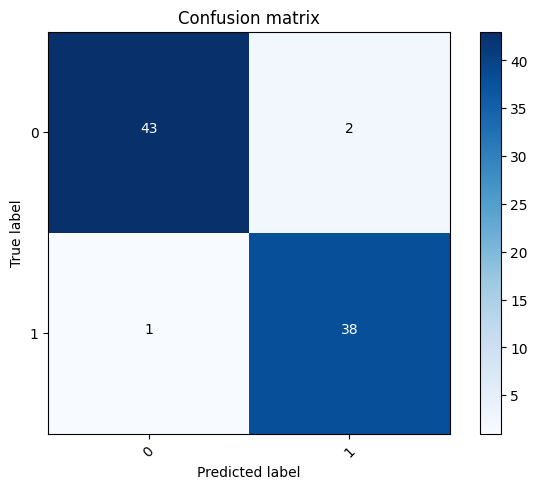

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

### Evaluate

In [16]:
import cv2
import numpy as np

def evaluate_criteria(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate text density (percentage of white pixels in the image)
    total_pixels = gray_image.shape[0] * gray_image.shape[1]
    white_pixels = cv2.countNonZero(gray_image)
    text_density = white_pixels / total_pixels
    
    # Detect font changes
    # Placeholder logic: Check if there are multiple font types used in the document
    font_changes_detected = detect_font_changes(gray_image)
    
    # Detect color/texture changes
    # Placeholder logic: Check for significant changes in color or texture throughout the document
    color_texture_changes_detected = detect_color_texture_changes(image)
    
    # Evaluate based on the criteria
    if text_density < 0.7 or font_changes_detected or color_texture_changes_detected:
        return "Fake"
    else:
        return "Real"

def detect_font_changes(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to obtain binary image
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Extract bounding rectangles for each contour
    bounding_rectangles = [cv2.boundingRect(contour) for contour in contours]
    
    # Sort bounding rectangles by x-coordinate to get left-to-right order
    bounding_rectangles.sort(key=lambda x: x[0])
    
    # Initialize a list to store the detected text areas
    text_areas = []
    
    # Iterate over bounding rectangles to extract text areas
    for x, y, w, h in bounding_rectangles:
        if w > 5 and h > 5:  # Filter out small noise contours
            text_areas.append(gray_image[y:y+h, x:x+w])
    
    # Placeholder logic to detect font changes
    # Check for differences in text sizes, font styles, etc.
    # For simplicity, we'll check if there are multiple text areas with varying sizes
    if len(text_areas) > 1:
        return True
    else:
        return False

def detect_color_texture_changes(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Placeholder logic to detect color/texture changes
    # Calculate the standard deviation of pixel intensities
    std_dev = np.std(gray_image)
    
    # If the standard deviation is above a certain threshold, consider it a color/texture change
    # Adjust the threshold as needed based on your requirements
    if std_dev > 20:
        return True
    else:
        return False

In [51]:
import numpy as np

def add_noise(image, noise_level):
    # Add Gaussian noise
    noise = np.random.normal(loc=0, scale=noise_level, size=image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image


In [38]:
model_path = "model/1.keras"
model = load_model(model_path)  

In [43]:
import cv2
import numpy as np

def extract_features(image):
    # Initialize features dictionary
    features = {}

    # Calculate text density (percentage of white pixels in the image)
    total_pixels = image.shape[0] * image.shape[1]
    white_pixels = cv2.countNonZero(image)
    text_density = white_pixels / total_pixels
    features['text_density'] = text_density

    # Extract font information (e.g., font size, font style)
    # Implement font extraction logic here

    # Extract color/texture changes
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Compute Laplacian operator to detect edges
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
    # Calculate variance of Laplacian to measure texture changes
    texture_variation = np.var(laplacian)
    features['texture_variation'] = texture_variation

    # Implement additional feature extraction logic as needed

    return features

In [56]:
def preprocess_image(image_path, apply_noise=False, noise_level=25):
    # Load the image
    img = cv2.imread(image_path)
    # Convert to RGB format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize the image to match the model's input shape
    img = cv2.resize(img, (128, 128))
    # Normalize the image
    img = img / 255.0
    # Add noise if specified
    if apply_noise:
        img = add_noise(img, noise_level)
    return img


In [45]:
def predict_image_authenticity(image_path):
    # Preprocess image
    img = preprocess_image(image_path)
    # Reshape for model input
    img = np.expand_dims(img, axis=0)
    # Predict
    prediction = model.predict(img)
    # Get predicted class
    predicted_class = np.argmax(prediction, axis=1)[0]
    return predicted_class

In [46]:
def predict_image_probabilities(image_path):
    # Preprocess image
    img = preprocess_image(image_path)
    # Reshape for model input
    img = np.expand_dims(img, axis=0)
    # Predict
    probabilities = model.predict(img)[0]
    return probabilities    

In [47]:
images_folder = 'images/predict'
model_path = "model/1.keras"

In [58]:
model_path = "model/1.keras"
try:
    model = load_model(model_path)
except Exception as e:
    print("Error loading the model:", str(e))
    exit()

# Iterate through images and classify
for category in os.listdir(images_folder):
    category_path = os.path.join(images_folder, category)
    if os.path.isdir(category_path):
        for image_file in os.listdir(category_path):
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(category_path, image_file)
                try:
                    img = preprocess_image(image_path, apply_noise=True, noise_level=25)

                    # Reshape for model input
                    img = np.expand_dims(img, axis=0)
                    # Predict
                    probabilities = model.predict(img)[0]
                    authenticity = np.argmax(probabilities)
                    if category == "original" and authenticity == 0:
                        print(f"{image_file} is classified as REAL with probability: {probabilities[authenticity]}")
                    elif category == "tampered" and authenticity == 1:
                        print(f"{image_file} is classified as FAKE with probability: {probabilities[authenticity]}")
                    else:
                        print(f"{image_file} is classified incorrectly.")
                except Exception as e:
                    print(f"Error processing {image_file}: {str(e)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Adalynn_Bailey_Original_Paystub-checkpoint.jpg is classified incorrectly.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Adalynn_Bailey_Tampered_Paystub-checkpoint.jpg is classified incorrectly.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
TamperedPaystub-checkpoint.jpg is classified incorrectly.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
tampered_1.pdf_page0.jpg is classified incorrectly.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
tampered_2.pdf_page0.jpg is classified incorrectly.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
tampered_3.jpg is classified incorrectly.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
tampered_4.pdf_page0.jpg is classified incorrectly.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
tampered_4.pdf_page4.jpg is classified incorrectly.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
tampered_4.pdf_page5.jpg is classified incorrectly.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
tampered_5.jpg is classified incorrectly.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
vineet_passport_card-checkpoint.